<a href="https://colab.research.google.com/github/harshavardhan117/Spark-intern-tasks/blob/master/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Assigned Task**

The task is to **predict the percentage of a student based on the no. of study hours**.

####**Step 1: Importing required libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####**Step 2: Reading the dataset**

In [10]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


####**Step 3:Data Preprocessing and exploration**

As displayed above, the given sample dataset has **two variables**. As a result of that, the task is accomplished using **simple linear regression** also known as **bivariate regression**.

In [11]:
#Displaying the dimensions of the dataset
df.shape

(25, 2)

In [12]:
#generating the descriptive statistics of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#Checking for any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

The number of null values is zero. so we can proceed to next process.

Now, we extract the dependent and the independent variable into two different containers(ie. x,y). Here the **dependent variable** is **scores** and the **independent variable** is **Hours**.

In [14]:
x= df.iloc[:, :-1].values #Independent Variable
y = df['Scores'] #Dependent Variable

####**Step 4: Data Visualization**

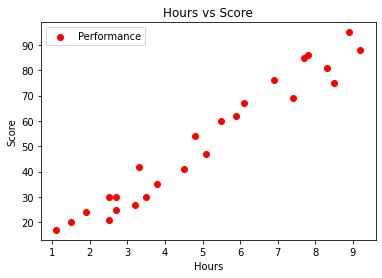

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x, y, label = 'Performance', color='red')
plt.title("Hours vs Score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend()
plt.show()

####**Step 5: Train-Test split**

In [16]:
# Splitting the dataset into training and test set, so that accuracy of the model is measured.
# 75 percent train set and 25 percent test set is considered, we can decide the percentage as required.
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/4, random_state=0)

In [17]:
x.shape, y.shape #Number of Examples in each feature of the original given sample dataset

((25, 1), (25,))

In [18]:
x_train.shape, y_train.shape #Number of Examples in each feature of the training dataset

((18, 1), (18,))

In [19]:
x_test.shape, y_test.shape #Number of Examples in each feature of the test dataset


((7, 1), (7,))

####**Step 6: Model fitting**

In [20]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####**Step 7: Model Prediction**

In [21]:
#Prediction of Test set result  
y_pred= regressor.predict(x_test)


In [22]:
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

####**Step 8: Model Evaluation**

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805
R-2: 0.9367661043365056


R-2 gives the score of model fit and in this case we have R-2 = 0.9367661043365056 which is actually a great score for s simple regression model.

####**Step 9: Visualizing the results**

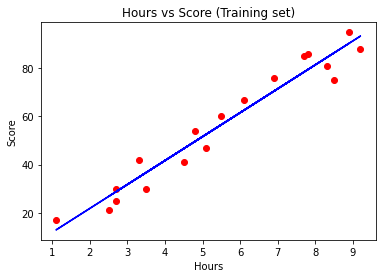

In [25]:
#Plot of Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

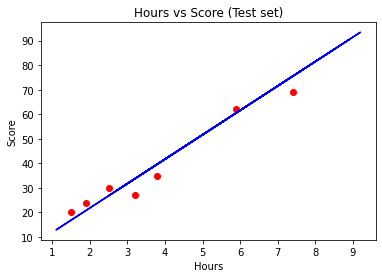

In [26]:
#Plot of Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()


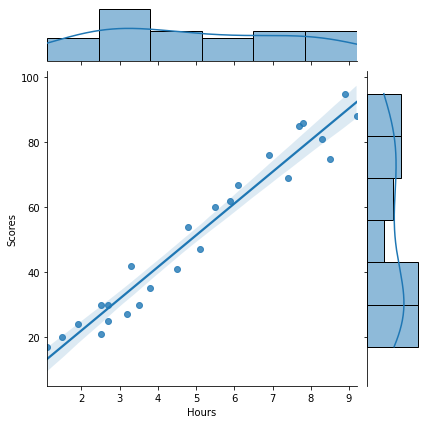

In [29]:
import seaborn as sns
sns.jointplot(x=df['Hours'], y=df['Scores'],kind='reg')

In [30]:
# Testing the model with some random data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


####**The above model implementation will do the job of Prediction using simple linear regression model. Also represents the data in different plots.**